# Sample code (eds)

This page contains sample code to start an EDS analysis with a specified detector and acquire Spectrum data.

The packages used are eds, detectorext.

The functions to be introduced are as follows

- Get a list of detectors that can be controlled
- Get or set a detector information
- Image capturing

Prerequisites

- DetectorService is running (in the case of online)
- Femtus is running (in the case of online)
- Ver.1.3.0 (Operation check environment)

## 0. Import TEM3
*** 

In [1]:
from PyJEM import detectorext
from PyJEM import eds

import matplotlib.pyplot as plt

## 1. Select a detector

In [2]:
detectorext.function.assign_channel('HAADF', 1)

{'status': 'OK'}

## 2. Place annotations

In [3]:
args = {'LUTScanSetting': {'LookUpTable': '[]',
  'Shape': 2,# Line=2, Square=3  
  'Position': [[-1, -1], [1, 1]],
  'PixelResolution': 2,
  'IgnorePixelCount': 0,
  'BlankingCount': 0}}

detectorext.set_LUTscansetting(args)

{'status': 'OK'}

## 3. Set EDS parameter setting.

In [4]:
args2 = {'ProcessTime': ['T1', None, None, None],
 'DwellTime': 4700.0,
 'CollectionMode': 3,
 'SweepCount': 1,
 'EnableScanSync': False,
 'EDSSelected': True}

eds.set_acquisition_settings(args2)

{'ProcessTime': ['T1', None, None, None],
 'DwellTime': 1000.0,
 'CollectionMode': 3,
 'SweepCount': 0,
 'EnableScanSync': False,
 'EDSSelected': True}

## 4. Start acquisition

In [9]:
data_id = eds.start_acquisition()
data_id

{'Version': '08', 'DataID': 'e6b698ec-4209-44ba-a0ea-be3ebb507993'}

## 5. get_spectrum_data

In [10]:
binary = eds.get_spectrum_data({"TargetDataID" : data_id["DataID"]})

## 6. Output as graph

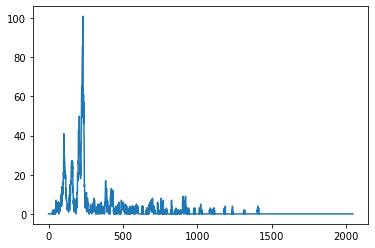

In [11]:
# Divide binary data into 4-byte units
binary_intensity_list = [binary[i:i+4] for i in range(0, len(binary), 4)]

# Transfer binary data to int.
intnum = []
for intensity in binary_intensity_list:
    intnum.append( int.from_bytes(intensity, byteorder="little"))

# Drawing on graphs (EDS Spectrum)
%matplotlib inline
plt.plot(intnum)